# 1. 
What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

## My Solution 

High dimensional datasets take a while to train, hard to visualize and might be sparse. Reducing the dimensions improves training time, makes visualizations possible, and can reduce the space inbetween instances.


# 2. 
What is the curse of dimensionality?

## My Solution 

Having a huge dataset with many features and instances. While it might lead to better overall results, it is computationally taxing.

# 3. 

Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

## My Solution 

Yes it is possible to reverse the operation. We can do so by taking using the inverse operation that it: 

$$ X_{recovered} = X_{d-proj} W_d^T$$

# 4. 
Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

## My Solution 

Yes, kernel PCAs would be best for this. 

# 5. 

Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

## My Solution 

There is not set number of dimensions the PCA will return. It simply attempts to find the Sum of principle components that will get us to 95% variance. Anything less than n. 

# 6. 
In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

## My Solution 

Vanilla PCA: If you have the entire dataset and no issues with time. 

Incremental PCA (In my mind: mini-batch PCA): When the dataset is rather large in dimension or instances. If you want to spread the load across multiple servers, or do it as the data comes in. 

Randomized PCA: When the dataset is rather large in instances. 

Kernel PCA: When the dataset it highly non-linear 

# 7. 
How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

## My Solution 

By how much variance it perserves.

# 8.

Does it make any sense to chain two different dimensionality reduction algorithms?

## My Solution 

Yes and no. For speed on high dimensional non-linear dataset and when the data batched, it makes sense to chain Incremental and Kernal PCAs Other than that, I don't know why we would.


# 9. 


Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

## My Solution 


In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

#Load the data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

In [2]:
#My rig is slow so on a subset of the required subset I will train and test
m = 20000
n= 30000
X_train,y_train = X[:m], y[:m]
X_test, y_test = X[m:n], y[m:n]

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
%timeit rnd_clf.fit(X_train, y_train)

11.8 s ± 1.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit y_pred_rf = rnd_clf.predict(X_test)

517 ms ± 52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
from sklearn.metrics import accuracy_score
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf) 

0.8023

In [8]:
#Now we reduce the dataset 
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
%timeit X2D = pca.fit_transform(X)

3.38 s ± 626 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
X2D = pca.fit_transform(X)
X_train,y_train = X2D[:m], y[:m]
X_test, y_test = X2D[m:n], y[m:n]

In [11]:
rnd_reduced_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
%timeit rnd_clf.fit(X_train, y_train)
rnd_clf.fit(X_train, y_train)

5.23 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
%timeit y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf) 

546 ms ± 83.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.8023

Dang, it took one third the time to train the reduced dataset in comparison to the non-reduced dataset. 

Predicting wasn't to faster, I'm sure it has to the do with the predictions run time.

# 10. 

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [13]:
#Taken from solutions 
np.random.seed(42)

m = 10000
#This on 60,000 instances is a lot. 
#Uses a random subset
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

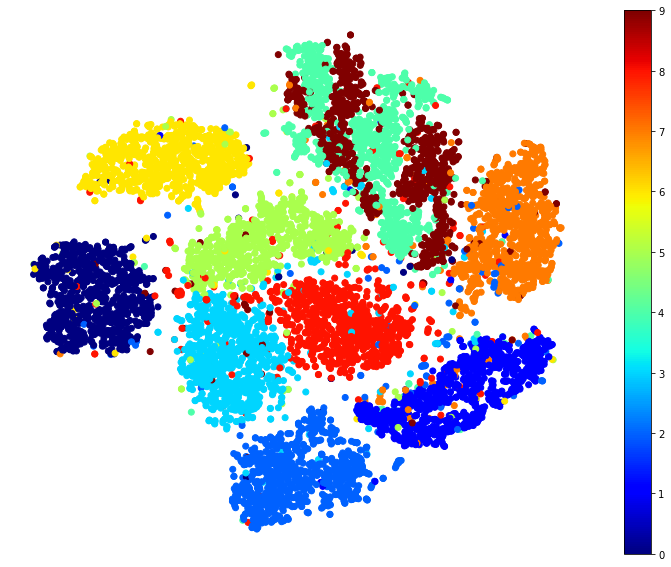

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()